## Wangle and Analyze Data for WeRateDogs twitter account

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href='#assess'>Data Assessing</a></li>
<li><a href='#clean'>Data Cleaning</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#source">Sources</a></li>
<li><a href="#conclusion">Conclusion</a></li>

</ul>

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog WeRateDogs has over 8.8 million followers and has received international media coverage.

#### Key points before start:
- The analysis only for original ratings (no retweets).
- Assessing and cleaning the entire dataset completely would require a lot of time. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](https://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
- Do not need to gather the tweets beyond August 1st, 2017. duo to won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [1]:
# Libraries Used
import pandas as pd
import requests
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


# View Options
# To view full columns contant(e.g. text,url, etc)
pd.set_option('display.max_colwidth',500)
# Set iPython's max column width to 32
pd.set_option('display.max_columns', 32)

<a id='gather'></a>
# Gather Data

In [2]:
# Load twitter archive to dataframe
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image predictions programmatically from Udacity's servers using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode='wb')  as file: file.write(response.content)

# Load image predictions to dataframe
imgpred = pd.read_csv('image-predictions.tsv',sep="\t")

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# twitter_arch is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

**Comment:**
The gather failed, the alternative is tweet-json.txt provided by udacity  
 <br><br>

In [5]:
# Load tweet json to dataframe
tweet_json = pd.read_json("tweet-json.txt", lines = True)
tweet_json = tweet_json[['id', 'retweet_count', 'favorite_count']]



# Assessing Data

To clearify this section, there are: 
Quality Issues
Tidiness Issues

**Quality Issues**

There are four main category in data quality:

- Cmpleteness: missing data?
- Validity: does the data make sense?
- Accuracy: inaccurate data? (wrong data can still show up as valid)
- Consistency: standardization?



**Tidiness Issues**

Three requirements for tidiness:

- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

In [6]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Comment: 


- **Data quality:** timestamp has time zone (e.g. 2017-08-01 16:23:56 **+0000**)
- **Data tideness:** The variable (Dog stage) stored in 4 columns(doggo, floofer, pupper, puppo)
- **Data tideness:** The observation is rating but there are unnecessary columns(in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls) stored in the same table


 <br><br>

In [7]:
twitter_arch.shape

(2356, 17)

In [8]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Comment: 

- **Data quality:** Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- **Data quality:** tweet_id column data type is `int` instead of `string` 
- **Data quality:**  timestamp column data type is `object` instead of `datetime` 


 <br><br>

In [9]:
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
# View source unique inputs
twitter_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

#### Comment: 
WeRateDogs use iphone most of the time, twitter_arch have 4 sources;

- Twitter for iPhone
- Twitter Web Client
- Vine - Make a Scene
- TweetDeck

Tweets sources can be shorten (e.g.Twitter for iPhone)

 <br><br>

In [11]:
twitter_arch.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


#### Comment: 

- **Data quality:** In dog stages rows(doggo, floofer, pupper, puppo) has None instead of NaN, duo to that 1976 wasn't shown as missing data
- **Data quality:** 14 rows have more than one stage(invalid data)


 <br><br>

In [12]:
# checking invalid data
twitter_arch.query('doggo == "doggo" & puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


#### Comment: 
the tweet text mention both stages(doggo,puppo)

**action:** remove this row, index = 191


 <br><br>

In [13]:
# checking invalid data
twitter_arch.query('doggo == "doggo" & pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

#### Comment: 
the tweets text mention both stages(doggo,pupper) because there are two dog in the photo

**action:** remove these rows, to keep accuracy when analysis, index_list = [460,531,565,575,705,733,778,822,889,956,1063,1113]

 <br><br>

In [14]:

twitter_arch.query('doggo == "doggo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


#### Comment: 
the tweet text mention both stages(doggo,floofer) but the correct stage is floofer

**action:** remove this row, index = 200


 <br><br>

In [15]:
# check names
twitter_arch.groupby('name').size().reset_index().rename(columns={0: "count"})

,name,count
0,Abby,2
1,Ace,1
2,Acro,1
3,Adele,1
4,Aiden,1
...,...,...
952,such,1
953,the,8
954,this,1
955,unacceptable,1


#### Comment: 

- **Data quality:** there are names like (the, this, very, unacceptable) which is inaccurate names. Also, these names have lowercase characters


 <br><br>

In [16]:
# To view retweets
twitter_arch.query('retweeted_status_id != "NaN"').sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps:/…,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,Maddie,None,None,None,None
453,818588835076603904,NaN,NaN,2017-01-09 22:42:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,7.735476e+17,4.196984e+09,2016-09-07 15:44:53 +0000,"https://twitter.com/dog_rates/status/773547596996571136/photo/1,https://twitter.com/dog_rates/status/773547596996571136/photo/1",11,10,Chelsea,None,None,pupper,None


In [17]:
twitter_arch.query('retweeted_status_id != "nan"').shape[0]

181

In [18]:
# Original tweets
Original_tweets = twitter_arch.shape[0] - twitter_arch.query('retweeted_status_id != "nan"').shape[0]
Original_tweets

2175

#### Comment: 
From key points, the analysis focus on orignal tweets. # of Original tweets 2175, then # of retweets 181 
- **Data tideness:**  The observation is rating from original tweets, but retweets are stored in the same table.

 <br><br>

In [19]:
twitter_arch.isnull().shape[0]

2356

In [20]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Comment: 
rating_denominator mean larger than 10!?

In [21]:
# Check rating_denominator
twitter_arch.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [22]:
# Check who got 0 score
twitter_arch.query('rating_denominator == 0')
# NA in expanded_urls, rating_numerator	

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [23]:
# Check who got 10 score
twitter_arch.query('rating_denominator == 10').shape[0]
#2333 have 10 as rating_denominator

2333

#### Comment: 
Denominator should be fixed to 10 but from 2356 there are 23 have denominator not equal to 10;

- Total: 2356
- Denominator below ten : 3
- Denominator ten: 2333
- Denominator above ten: 20 ( = 2356-3-2333)


 <br><br>

In [24]:
twitter_arch.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [25]:
# Check who got less than 10 as rating
twitter_arch.query('rating_numerator < 10').shape[0]
#440 have less than 10 as rating_numerator

440

In [26]:
# Check who got greater than 10 as rating
twitter_arch.query('rating_numerator > 10').shape[0]
#1455 have greater than 10 as rating_numerator which assist the claim in udacity introduction "numerators most the time greater than 10"

1455

#### Comment: 
Numerator rating analysis;

- Total: 2356
- Denominator below ten : 440
- Denominator ten: 461 ( = 2356-440-1455)
- Denominator above ten: 1455 

#### since it is unique rating system no further clean needed
 <br><br>

#### `imgpred` table

In [27]:
imgpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Comment: 
from Image Predictions File provided in project page

Columns definition table with example:
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

 <br><br>

In [28]:
imgpred.shape

(2075, 12)

In [29]:
# imgpred accurcy
imgpred.shape[0]/Original_tweets*100

95.40229885057471

In [30]:
# Number of image missed
Original_tweets - imgpred.shape[0]

100

#### Comment: 
from twitter archive has 2175 Original tweets, however the image predictions miss 100 image and accurcy 95%

**Data qulity:** Missing 100 image

 <br><br>

In [31]:
imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Comment: 
Other than 100 image, no nulls

**Data qulity:** tweet_id column data type is int instead of string 
 <br><br>

#### `tweet_json` table

In [32]:
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Comment: 

**Data qulity:** to match other table **id** insted of **tweet_id**

 <br><br>

In [33]:
tweet_json.shape

(2354, 3)

In [34]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Comment: 
**Data qulity:** tweet_id column data type is int instead of string 
 <br><br>

<a id='assess'></a>
## Summary for Assess

### Quality Issues
##### `twitter_arch` table
- Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- tweet_id column data type is `int` instead of `string`
- timestamp column data type is `object` instead of `datetime`
- timestamp has time zone (e.g. 2017-08-01 16:23:56 **+0000**)
- In dog stages rows(doggo, floofer, pupper, puppo) has None instead of NaN, duo to that 1976 wasn't shown as missing data
- 14 rows have more than one stage(invalid data)
- There are names like (the, this, very, unacceptable) which is inaccurate names. Also, these names have lowercase characters


##### `imgpred` table
- Missing 100 image

##### `tweet_json` table
- To match other table **id** insted of **tweet_id** 




###  Tidiness Issues
- All table observe rating but observation store into multiple tables
- The variable (Dog stage) stored in 4 columns(doggo, floofer, pupper, puppo)
- The observation is rating from original tweets, but retweets are stored in the same table
- The observation is rating but there are unnecessary columns(in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls) stored in the same table


 <br><br>

In [35]:
twitter_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

<a id='clean'></a>

# Cleaning Data

In [36]:
# Copy to new dataframe before cleaning
twitter_arch_clean = twitter_arch.copy()
imgpred_clean = imgpred.copy()
tweet_json_clean = tweet_json.copy()

***Define***

- **Data tidiness:** Combine tables into one table to describe the observation

***Code***

In [37]:
# merge first two dataframes
tweets = pd.merge(twitter_arch_clean, imgpred_clean,
                            on='tweet_id', how='left')

In [38]:
# To merge need to rename column id into tweet_id
tweet_json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [39]:
# merge dataframes together
tweets = pd.merge(tweets, tweet_json_clean, 
                            on='tweet_id', how='left')

***Test***

In [40]:
# check
tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

***Define***

- 1) **Data quality:** In dog stages rows(doggo, floofer, pupper, puppo) has None instead of NaN, duo to that 1976 wasn't shown as missing data

***Code***

In [41]:
tweets.doggo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tweets.floofer.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tweets.pupper.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
tweets.puppo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)

***Test***

In [42]:
tweets.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


***Define***

- 2) **Data quality:** 14 rows have more than one stage(invalid data)

After assessing this issue have the following actions:

     - Row have doggo & puppo, remove this row, index = 191
     - Rows have doggo & pupper, remove these rows, to keep accuracy when analysis, 
     index_list = [460,531,565,575,705,733,778,822,889,956,1063,1113] 
     - Row have doggo & floofer, remove this row, index = 200

***Code***

In [43]:
# invalid_stages_index = [191,460,531,565,575,705,733,778,822,889,956,1063,1113,200]
invalid_stages_index = [460,531,565,575,705,733,778,822,889,956,1063,1113]

In [44]:
tweets.at[191,'doggo'] = ""
tweets.at[200,'doggo'] = ""

In [45]:
tweets.drop(invalid_stages_index, inplace = True)

***Test***

In [46]:
tweets.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,30
2,,,pupper,,245
3,,floofer,,,10
4,doggo,,,,83


***Define***

- **Data tidiness:** The variable (Dog stage) stored in 4 columns(doggo, floofer, pupper, puppo)


***Code***

In [47]:
# Combine dog stage into one column
# Extract the text from the columns into the new dog_stage colunn
tweets['dog_stage'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

***Test***

In [48]:
#check
tweets.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1",11,10,Lilli,,,,,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4.0,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True,1027.0,3904.0,NaN
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Brody. That is his chair. He loves his chair. Never leaves it. 9/10 might be stuck actually https://t.co/WvJRg0XJit,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293079592961/photo/1,9,10,Brody,,,,,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1.0,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True,816.0,2906.0,NaN
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nigel. He accidentally popped his ball after dunking so hard the backboard shattered. 10/10 great great pup https://t.co/vSd1TWFK1I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879788544000/photo/1,10,10,Nigel,,,,,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1.0,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True,173.0,460.0,NaN


In [49]:
tweets.dog_stage.value_counts()

pupper     262
doggo       85
puppo       37
floofer      4
Name: dog_stage, dtype: int64

***Define***
- 3) **Quality Issue:** tweet_id type need convert to string format

- 4) **Quality Issue:** Proper Timestamp format(without time zone)

- 5) **Quality Issue:** Timestamp type need convert to datetime format

***Code***

In [50]:
# Convert tweet_id to string
tweets.tweet_id = tweets.tweet_id.astype('str')

# To remove the time zone from the 'timestamp' column
tweets.timestamp = tweets.timestamp.str.slice(start=0, stop=-6)

# Convert timestamp to datetime
tweets.timestamp = pd.to_datetime(tweets.timestamp)

***Test***

In [51]:
tweets.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2        

In [52]:
tweets.timestamp.sample(3)

1683   2015-12-29 04:31:49
901    2016-07-28 01:31:38
1007   2016-06-28 01:21:27
Name: timestamp, dtype: datetime64[ns]

***Define***

- 6) **Quality Issue:** Delete retweets from the dataframe

***Code***

In [53]:
# To Keep original tweets only, the columns where retweeted_status_id is NaN(otherwise its retweets)
tweets = tweets.query('retweeted_status_id == "NaN"')

In [54]:
# Number of retweets
twitter_arch.shape[0] - tweets.shape[0]

191

***Test***

In [55]:
tweets.shape

(2165, 31)

***Define***

- 7) **Quality Issue:** Rows no longer needed

***Code***

In [56]:
# Retweets related columns no longer needed
drop_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 
                'retweeted_status_timestamp', 'expanded_urls', 'source', 'doggo', 'floofer', 'pupper', 'puppo']
tweets.drop(drop_columns, axis = 1, inplace=True)

***Test***

In [57]:
tweets.head(0)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage


***Define***

- 8) **Quality Issue:** inaccurate names(e.g. dog name "a, an, the, very"), luckly inaccurate name has lowercase as patren.

In [58]:
tweets.name.value_counts()[:3]

None    675
a        55
Lucy     11
Name: name, dtype: int64

In [59]:
tweets.shape[0]

2165

***Code***

In [60]:
# Total number of inaccurate names
tweets['name'].str[0].str.islower().sum()

103

In [61]:
tweets = tweets[tweets['name'].str[0].str.isupper()]

***Test***

In [62]:
tweets.name.value_counts()[:3]

None       675
Lucy        11
Charlie     11
Name: name, dtype: int64

In [63]:
tweets.shape[0]

2062

In [64]:
tweets.query('name == "a"')
# tweets.query('name == "an"')
# tweets.query('name == "the"')
# tweets.query('name == "very"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage


***Define***

- 9) **Quality Issue:** incorrect rating_denominator

For rows with rating_denominator != 10, there are cases where they are valid ratings and there are also invalid ones

In [65]:
# Lets check these rows
tweets[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


#### Comment: 

**Tweets to fix rating**
- tweet with `313` index has incorrect rating
- tweet with `1068` index has incorrect rating
- tweet with `1165` index has incorrect rating
- tweet with `1202` index has incorrect rating
- tweet with `1662` index has incorrect rating

**Tweets to remove**
- tweet with `342` index is a reply not new tweet
- tweet with `516` index shouldn't be any rating
- tweet with `1598` index is a reply not new tweet

 <br><br>

***Code***

In [66]:
# Adjust rating
tweets.at[313,'rating_numerator'] = 13
tweets.at[313,'rating_denominator'] = 10
tweets.at[1068,'rating_numerator'] = 14
tweets.at[1068,'rating_denominator'] = 10
tweets.at[1165,'rating_numerator'] = 13
tweets.at[1165,'rating_denominator'] = 10
tweets.at[1202,'rating_numerator'] = 11
tweets.at[1202,'rating_denominator'] = 10
tweets.at[1662,'rating_numerator'] = 10
tweets.at[1662,'rating_denominator'] = 10

In [67]:
# Drop rows
drp = [342, 516, 1598]
tweets.drop(drp, inplace = True)

***Test***

In [68]:
tweets[['tweet_id','text','rating_numerator','rating_denominator']].query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
1663,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20,16
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


***Define***

- 9) **Quality Issue:** incorrect rating_numerator

Some extraction wasn't done correctly, e.g. tweet_id 786709082849828864 has numerator 75 instead of 9.75

In [69]:
tweets[['tweet_id','text','rating_numerator','rating_denominator']].query('tweet_id == "786709082849828864"')

,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10


***Code***

In [70]:
ratings = tweets.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [71]:
tweets.rating_numerator = ratings[0]

***Test***

In [72]:
tweets[['tweet_id','text','rating_numerator','rating_denominator']].query('tweet_id == "786709082849828864"')

,tweet_id,text,rating_numerator,rating_denominator
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10


## Store

In [73]:
# Storing the dataframe after clean into csv
tweets.to_csv('twitter_archive_master.csv', index=False)

<a id='analysis'></a>
# Analyze and Visualize

## 1) Analyze Timeframe

In [75]:
# Tweets date
tweets.timestamp.max() - tweets.timestamp.min()

Timedelta('624 days 17:51:48')

In [76]:
# Timeframe analysis for the account
print('Started:', tweets.timestamp.min(),'Ended:', tweets.timestamp.max(), ', Last for:',624//30, 'Months and', 624%30, 'Days')

Started: 2015-11-15 22:32:08 Ended: 2017-08-01 16:23:56 , Last for: 20 Months and 24 Days


In [77]:
monthly_tweets = tweets.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()

,timestamp,tweet_id
0,2015-11-30,263
1,2015-12-31,366
2,2016-01-31,190
3,2016-02-29,117
4,2016-03-31,134


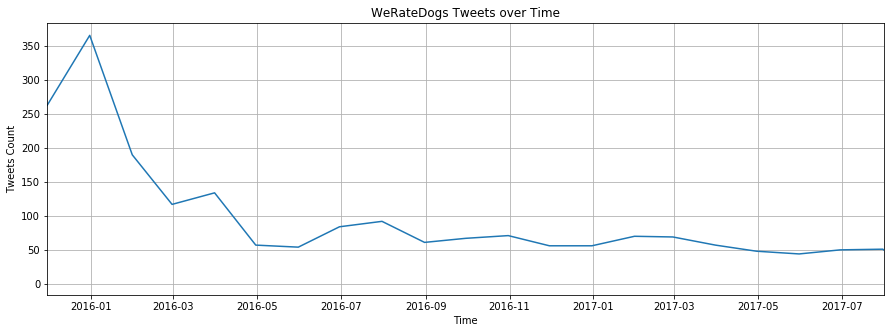

In [78]:
# Plot time vs tweets

plt.figure(figsize=(15, 5))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 1)]) 

plt.xlabel('Time')
plt.ylabel('Tweets Count')
plt.grid()

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');


#### Comment: 
WeRateDogs start for first 3 months more than 200 tweets per month, after that it drop and settled to 50 per month.

 <br><br>

## 2) Analyze dog type tweeted

In [79]:
tweets['dog_stage'].value_counts()

pupper     230
doggo       74
puppo       32
floofer      4
Name: dog_stage, dtype: int64

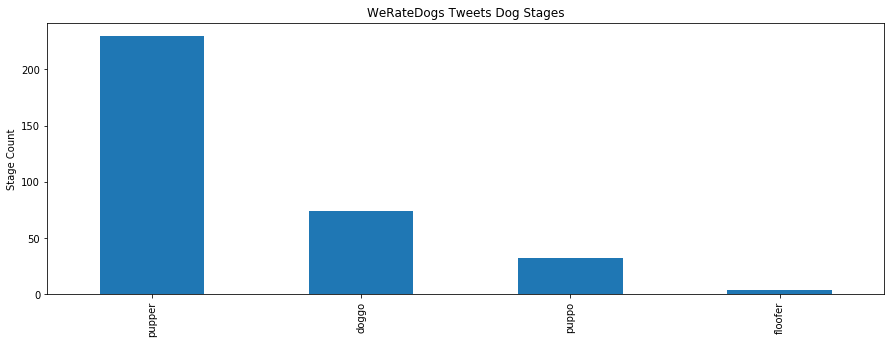

In [80]:
# Plot Dog Types

plt.figure(figsize=(15, 5))

plt.ylabel('Stage Count')
plt.grid()

tweets['dog_stage'].value_counts().plot(kind = 'bar')
plt.title('WeRateDogs Tweets Dog Stages');


#### Comment: 
Highest dog stage tweets for Pupper which encourage to start a business provide pupper accessories would receive better income compare with accessories for other stages

 <br><br>

In [81]:
tweets.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [82]:
tweets.retweet_count.max()

79515.0

## 3) Analyze Common dog names

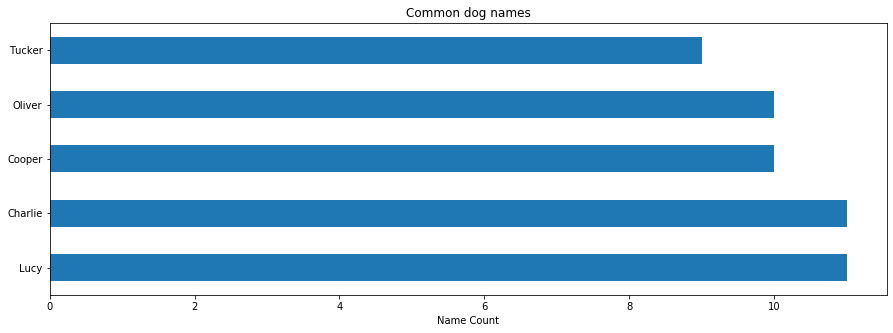

In [83]:
# Plot Dog Types

plt.figure(figsize=(15, 5))

plt.xlabel('Name Count')
plt.grid()

# remove rows with none names
tweets_no_none = tweets.query('name != "None"')
# top 5 names
tweets_no_none['name'].value_counts()[0:5].plot(kind = 'barh');
plt.title('Common dog names');

#### Comment: 
Top 5 dog names are Lucy, Charlie, Cooper, Cooper, Penny.  A lot of dog owner name his dog Lucy.

 <br><br>

<a id='source'></a>
# Source
- [Stackoverflow replace all characters](https://stackoverflow.com/questions/42093663/replace-all-characters-in-string-beside-a-z-0-9-and)
- [Stackoverflow Removing rows from dataframe whose first letter is in lowercase](https://stackoverflow.com/questions/50599934/removing-rows-from-dataframe-whose-first-letter-is-in-lowercase)
- [Datetime library](https://docs.python.org/3/library/datetime.html)
- [Matplotlib Tutorial](https://matplotlib.org/3.3.0/tutorials/index.html)

<a id='conclusion'></a>
# Conclusion

Twitter account archive enhanced have multiple data quality and tidiness issues that need to wrangle before getting into data analysis. Highest dog stage tweets for Pupper which encourage to start a business provide pupper accessories would receive better income compare with accessories for other stages. A lot of dog owner name his dog Lucy.